# Bot-vs-bot reverts
## Getting and processing data

In [ ]:
# bot-vs-bot revert table: https://quarry.wmflabs.org/query/17237

!wget https://quarry.wmflabs.org/run/161084/output/0/tsv?download=true -O botvbot.tsv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("botvbot.tsv", sep="\t")
len(df)

162688

In [3]:
print(df.columns)

Index(['rev_id', 'rev_timestamp', 'rev_user', 'rev_user_text', 'rev_page',
       'rev_sha1', 'rev_minor_edit', 'rev_deleted', 'rev_parent_id',
       'archived', 'reverting_id', 'reverting_timestamp', 'reverting_user',
       'reverting_user_text', 'reverting_page', 'reverting_sha1',
       'reverting_minor_edit', 'reverting_deleted', 'reverting_parent_id',
       'reverting_archived', 'rev_revert_offset', 'revisions_reverted',
       'reverted_to_rev_id', 'page_namespace'],
      dtype='object')


In [4]:
df[0:5]

,rev_id,rev_timestamp,rev_user,rev_user_text,rev_page,rev_sha1,rev_minor_edit,rev_deleted,rev_parent_id,archived,...,reverting_page,reverting_sha1,reverting_minor_edit,reverting_deleted,reverting_parent_id,reverting_archived,rev_revert_offset,revisions_reverted,reverted_to_rev_id,page_namespace
0,56161718,20060531172522,91310,CanisRufus,584516,1lyohbi8ymubjfzdb4w4ssfiflfpgat,1,0,54170358,0,...,584516,b3lf3olmh1hw99f68tjh187jl7dzi1j,1,0,56161718,0,1,1,54170358,0
1,56161633,20060531172452,91310,CanisRufus,793703,bxfv9z3d7uypsla28qfioc5qs4l963w,1,0,54169562,0,...,793703,1nlk1pfhntoa3m0inrdpotrqb5ajxif,1,0,56161633,0,1,1,54169562,0
2,103117636,20070125105128,234358,Mathbot,5202035,6ruzx0gegy5xy0mw5yxsdnh1fir7mwd,0,0,102641383,0,...,5202035,c6uu9wkg34ko0nidqakdktfkkvcds3k,0,0,104315087,0,1,3,102641383,4
3,105582355,20070204154028,234358,Mathbot,6744678,p14vq3lzxeu50upo1ax9h3ya2hrz1hv,0,0,104618440,0,...,6744678,qaiydx752b8av3qp2zbnfpqspttpw91,0,0,105582355,0,1,1,104618440,4
4,105627219,20070204194135,234358,Mathbot,8468041,rebsad1ch2hvs85nhf0nwm2r8ukboil,0,0,104982162,0,...,8468041,3lda2892o6z3p29r8xipbqh780h2rph,0,0,105627219,0,1,1,104982162,4


In [5]:
df['reverting_timestamp_dt'] = pd.to_datetime(df['reverting_timestamp'], format="%Y%m%d%H%M%S")

In [6]:
df = df.set_index('reverting_timestamp_dt')

### Total reverts by namespace

In [7]:
df.page_namespace.value_counts()

0      84804
4      31309
14     28753
1      10856
3       3372
2       1389
10      1326
5        355
6        218
11       215
109       37
100       27
7          9
118        5
15         4
108        4
101        3
12         2
Name: page_namespace, dtype: int64

## Group by reverts per day and namespace

In [8]:
gp = df.groupby([pd.TimeGrouper('1D', closed='left'), 'page_namespace'])

In [9]:
daily_namespace_g = gp.rev_id.count()
daily_namespace_g.head()

reverting_timestamp_dt  page_namespace
2006-05-20              0                 1
2006-06-30              0                 2
2006-07-21              1                 1
2006-07-24              0                 2
2007-02-05              4                 2
Name: rev_id, dtype: int64

In [10]:
namespaces = [0,1,2,3,4,5,6,10,11,14]

In [11]:
daily_namespace_g.unstack()[namespaces].head()

page_namespace,0,1,2,3,4,5,6,10,11,14
reverting_timestamp_dt,,,,,,,,,,
2006-05-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-21,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-24,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-05,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [12]:
daily_namespace_unstack = daily_namespace_g.unstack()[namespaces]

## Botplots

### Daily reverts subplotted by namespace, linear y-axis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1909d9d5c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1908ffc8d0>], dtype=object)

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


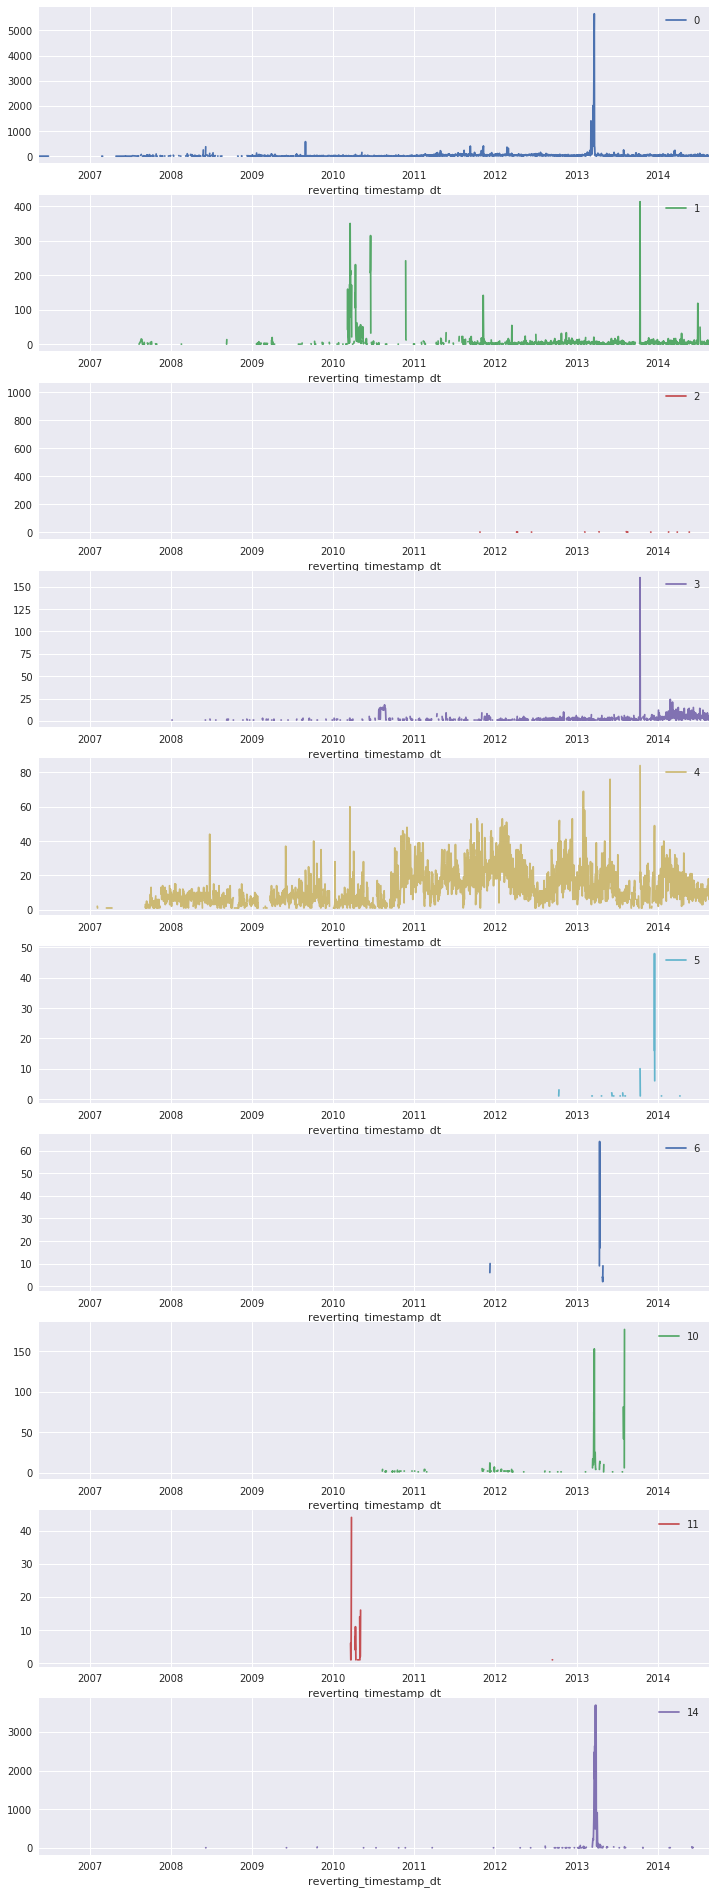

In [13]:
daily_namespace_unstack[namespaces].plot(subplots=True, figsize=[12,34], sharex=False, sharey=False, logy=False)

### Daily reverts subplotted by namespace, log y-axis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1908dabef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1908620da0>], dtype=object)

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


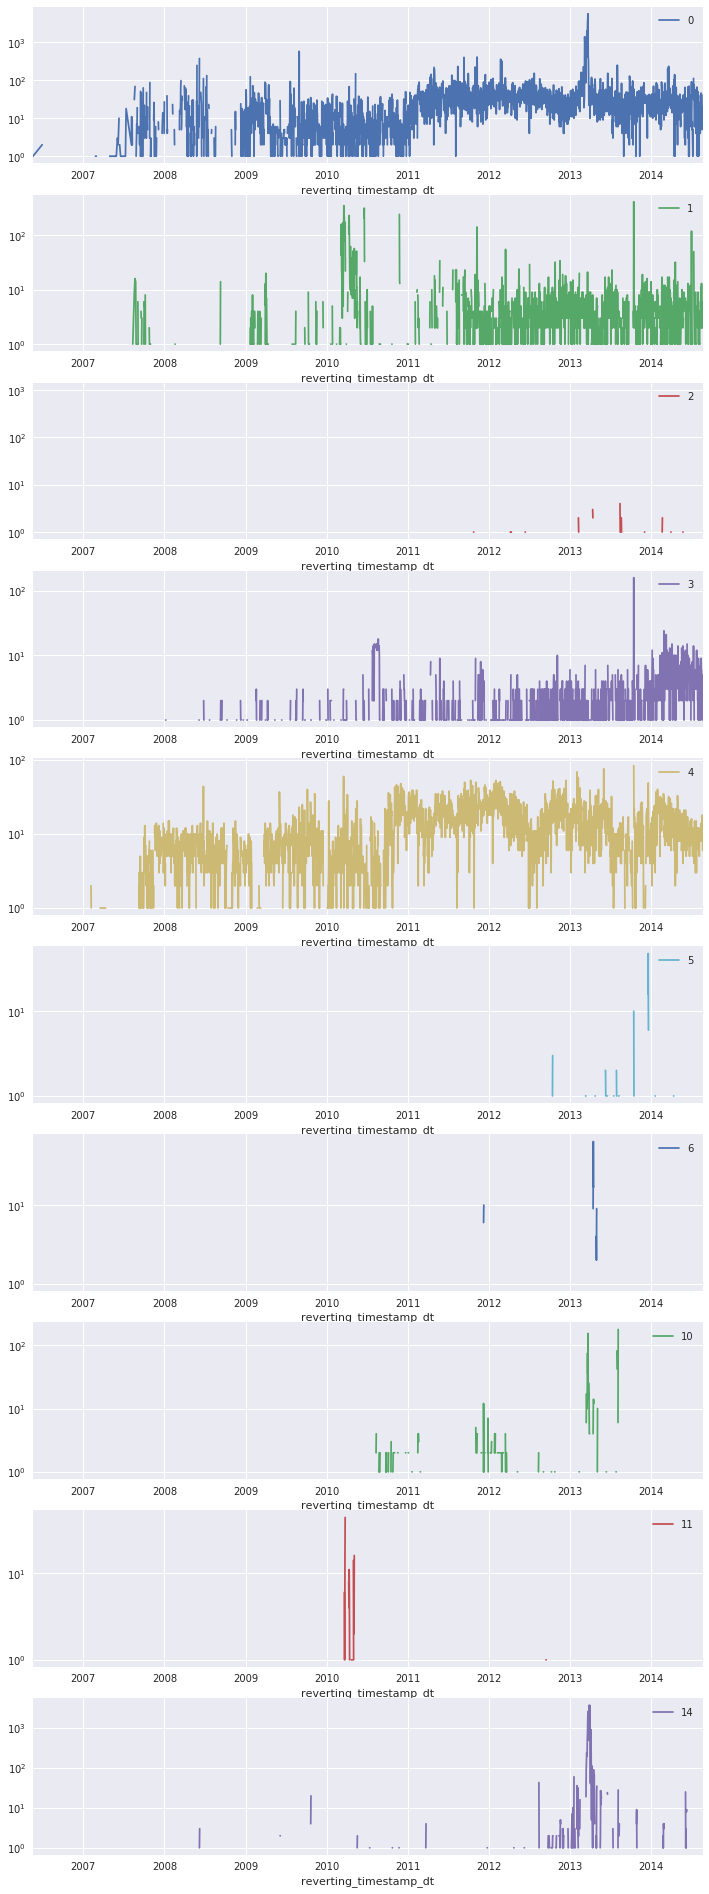

In [14]:
daily_namespace_unstack[namespaces].plot(subplots=True, figsize=[12,34], sharex=False, sharey=False, logy=True)

### Daily reverts by namespace, linear y-axis

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


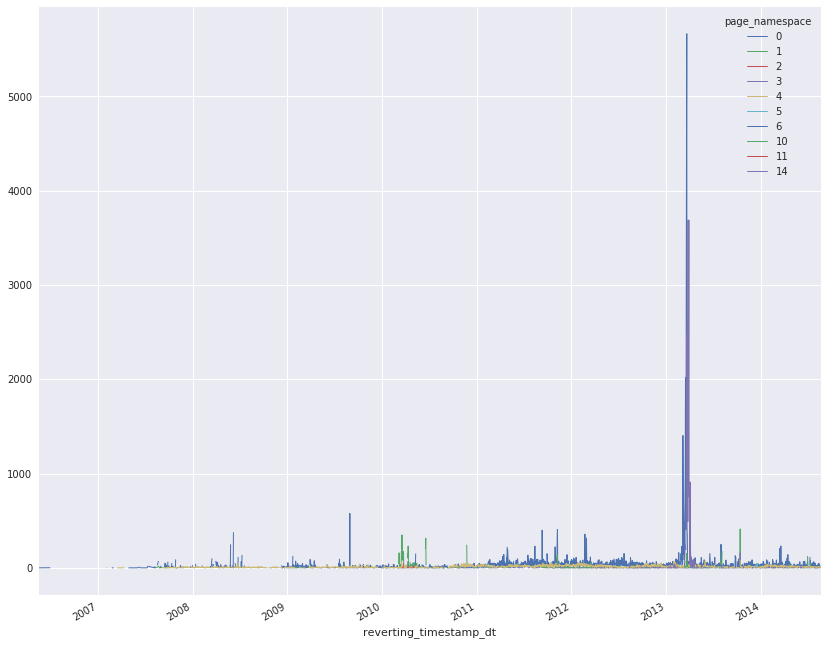

In [15]:
daily_namespace_unstack[namespaces].plot(kind='line', figsize=[14,12], linewidth=1)

## Group by reverts per week and namespace


In [16]:
gp2 = df.groupby([pd.TimeGrouper('1W', closed='left'), 'page_namespace'])

In [17]:
weekly_namespace_g = gp2.rev_id.count()
weekly_namespace_g.head()

reverting_timestamp_dt  page_namespace
2006-05-21              0                 1
2006-07-02              0                 2
2006-07-23              1                 1
2006-07-30              0                 2
2007-02-11              4                 3
Name: rev_id, dtype: int64

In [18]:
namespaces = [0,1,2,3,4,5,6,10,11,14]

In [19]:
weekly_namespace_g.unstack()[namespaces].head()

page_namespace,0,1,2,3,4,5,6,10,11,14
reverting_timestamp_dt,,,,,,,,,,
2006-05-21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-02,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-23,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-30,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-11,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [20]:
weekly_namespace_unstack = weekly_namespace_g.unstack()[namespaces]

## Botplots

### Weekly reverts subplotted by namespace, linear y-axis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18fe5b4ba8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f18fe2dbc50>], dtype=object)

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


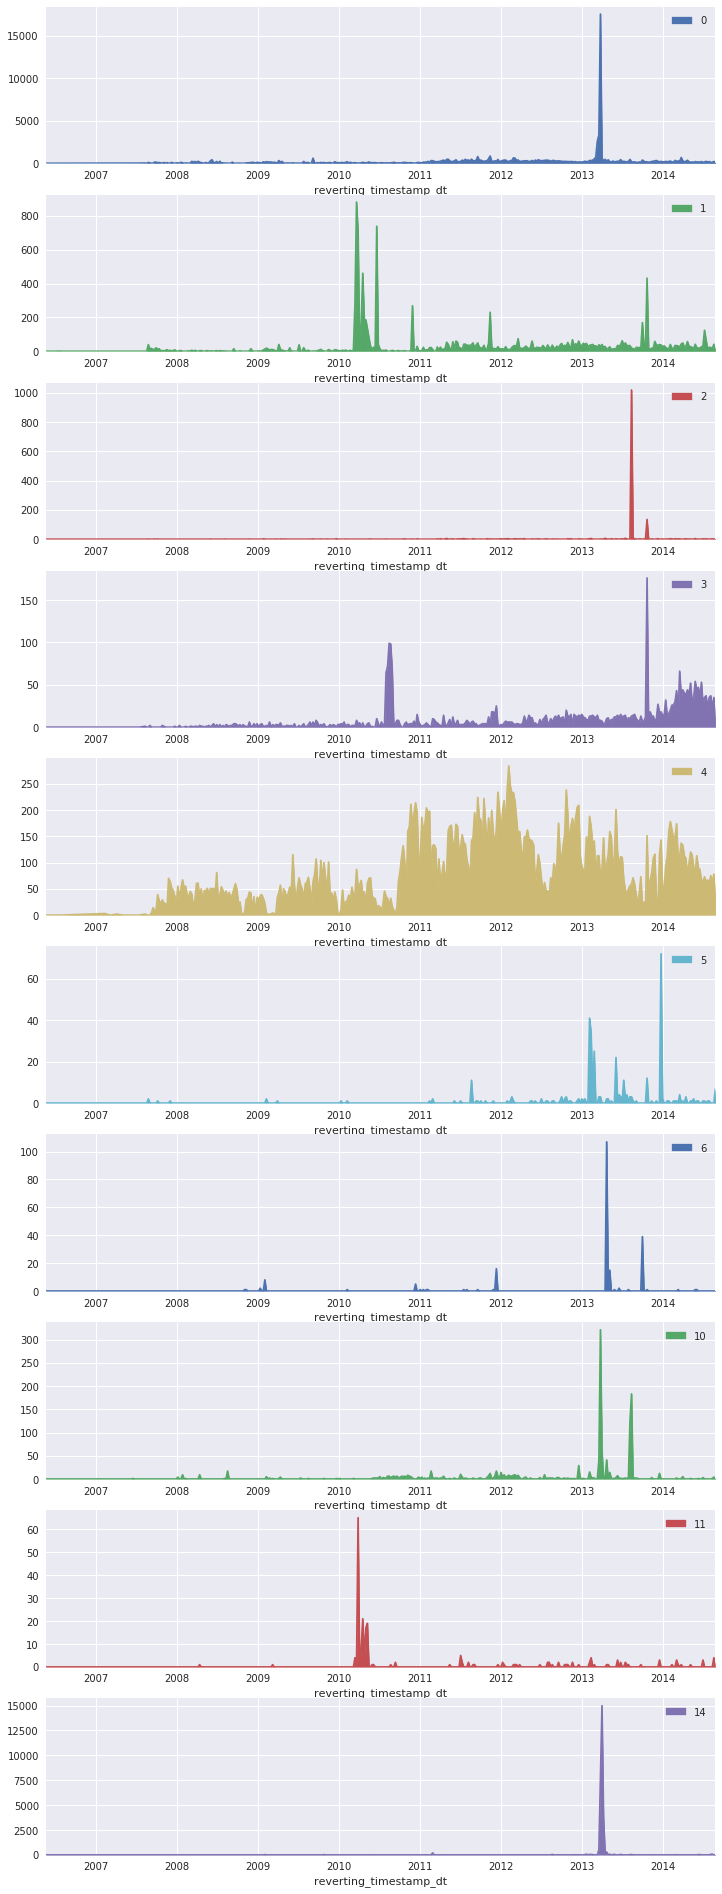

In [24]:
weekly_namespace_unstack[namespaces].plot(kind='area', subplots=True, figsize=[12,34], sharex=False, sharey=False, logy=False)

### Weekly reverts subplotted by namespace, log y-axis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18fdef7e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f18fdcca978>], dtype=object)

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


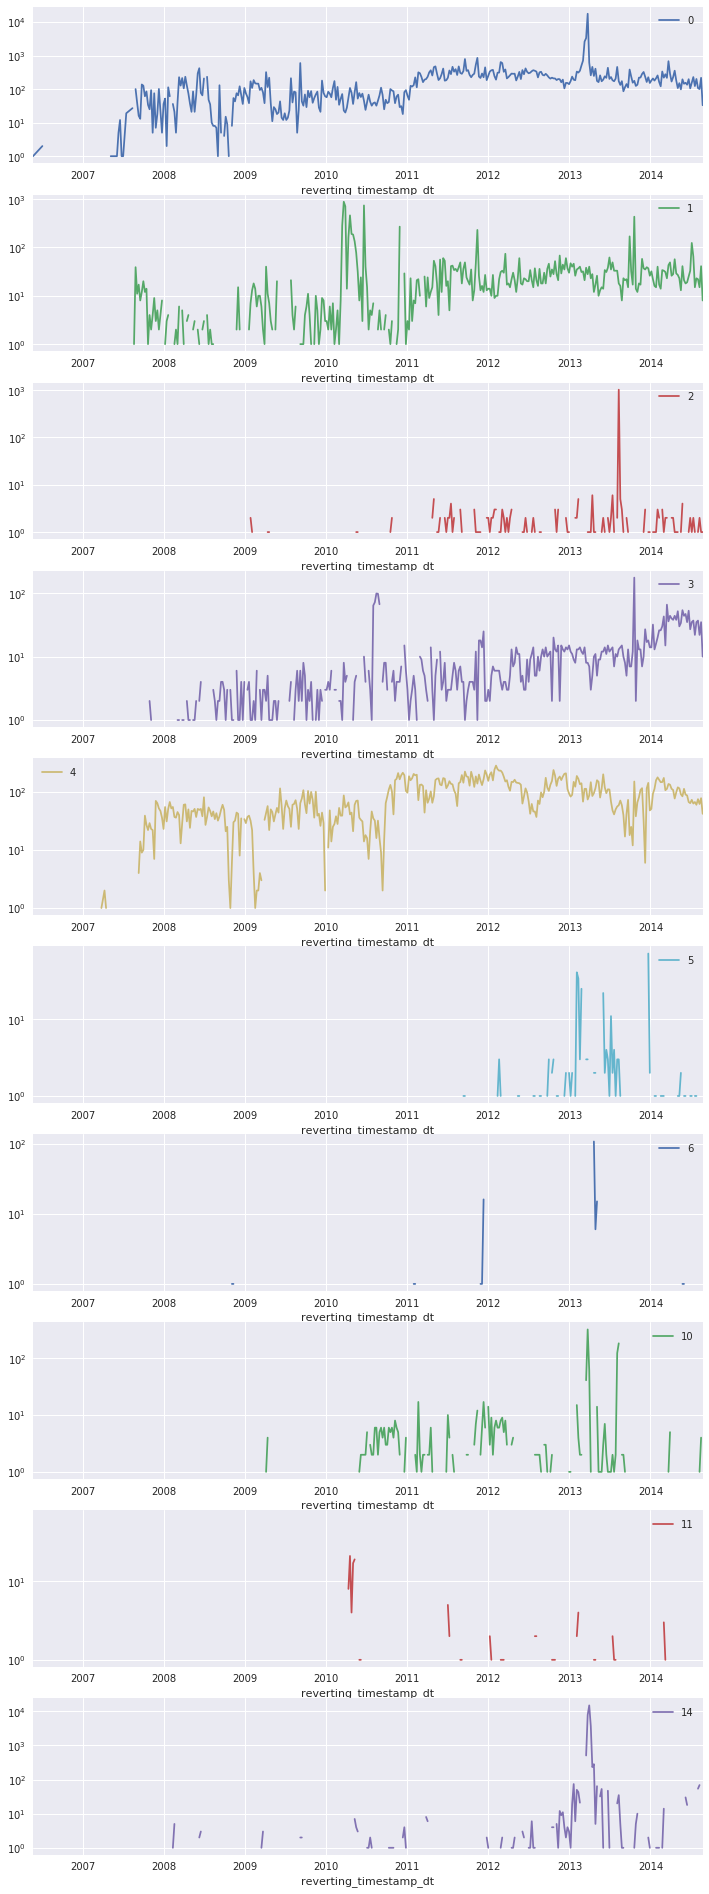

In [26]:
weekly_namespace_unstack[namespaces].plot(kind='line', subplots=True, figsize=[12,34], sharex=False, sharey=False, logy=True)

### Weekly reverts by namespace, linear y-axis

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


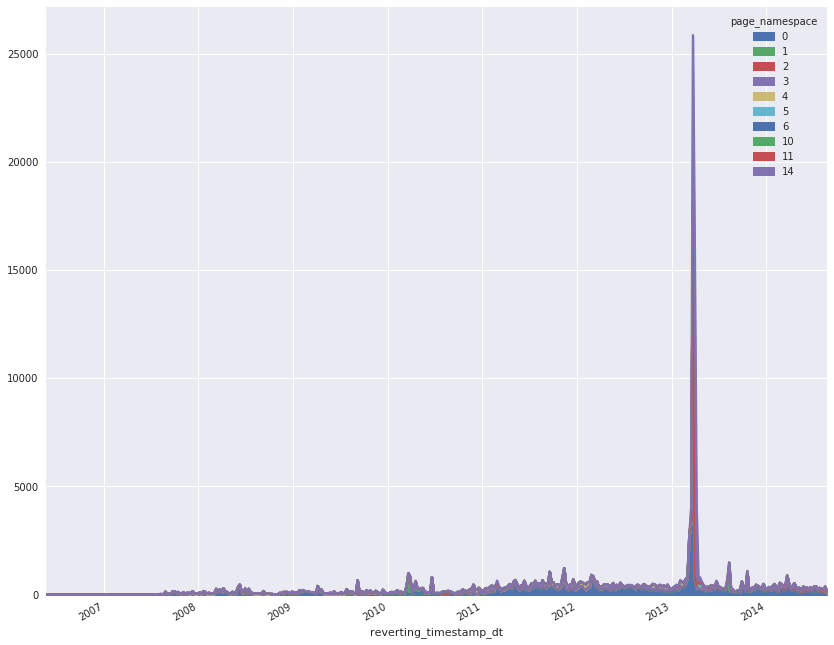

In [28]:
weekly_namespace_unstack[namespaces].plot(kind='area', stacked='true', figsize=[14,12], linewidth=2)